In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from numpy

In [3]:
from keras.datasets import mnist

In [4]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [5]:
print((type(train_X)))
print(train_y[0])
print(train_X.shape)
train_X = train_X.reshape(train_X.shape[0], -1).T / 255.0
test_X = test_X.reshape(test_X.shape[0], -1).T / 255.0
m, n = train_X.shape[1], train_X.shape[0]
print(m, n)

<class 'numpy.ndarray'>
5
(60000, 28, 28)
60000 784


In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
W1, b1, W2, b2 = gradient_descent(train_X, train_y, 0.10, 500)

Iteration:  0
0.1273
Iteration:  10
0.23603333333333334
Iteration:  10
0.23603333333333334
Iteration:  20
0.3362
Iteration:  20
0.3362
Iteration:  30
0.4122
Iteration:  30
0.4122
Iteration:  40
0.47913333333333336
Iteration:  40
0.47913333333333336
Iteration:  50
0.5353
Iteration:  50
0.5353
Iteration:  60
0.5774666666666667
Iteration:  60
0.5774666666666667
Iteration:  70
0.6092333333333333
Iteration:  70
0.6092333333333333
Iteration:  80
0.6341833333333333
Iteration:  80
0.6341833333333333
Iteration:  90
0.65405
Iteration:  90
0.65405
Iteration:  100
0.6714833333333333
Iteration:  100
0.6714833333333333
Iteration:  110
0.6857
Iteration:  110
0.6857
Iteration:  120
0.6985
Iteration:  120
0.6985
Iteration:  130
0.7093833333333334
Iteration:  130
0.7093833333333334
Iteration:  140
0.7193833333333334
Iteration:  140
0.7193833333333334
Iteration:  150
0.7293166666666666
Iteration:  150
0.7293166666666666
Iteration:  160
0.73795
Iteration:  160
0.73795
Iteration:  170
0.7453666666666666
It

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = train_X[:, index]
    prediction = make_predictions(train_X[:, index].reshape(-1, 1), W1, b1, W2, b2)
    label = train_y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


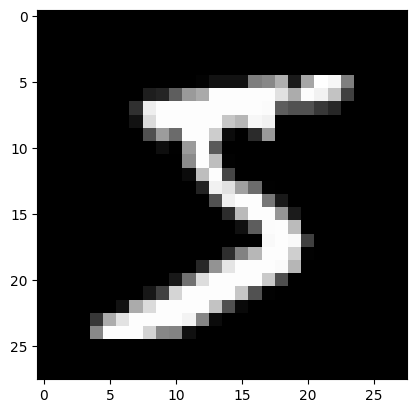

Prediction:  [0]
Label:  0


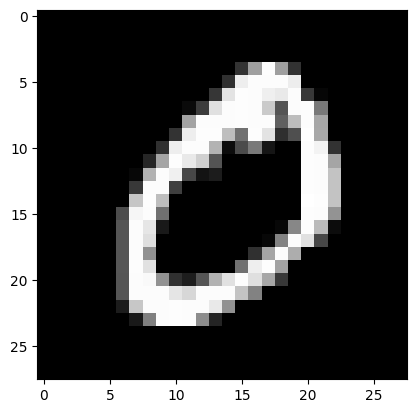

Prediction:  [5]
Label:  4


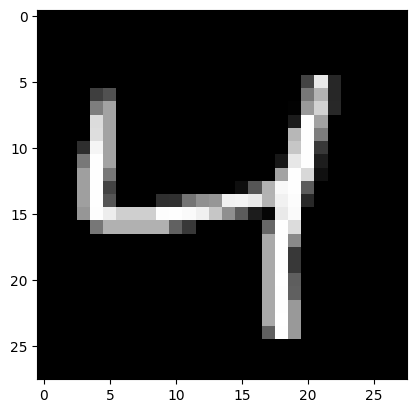

Prediction:  [1]
Label:  1


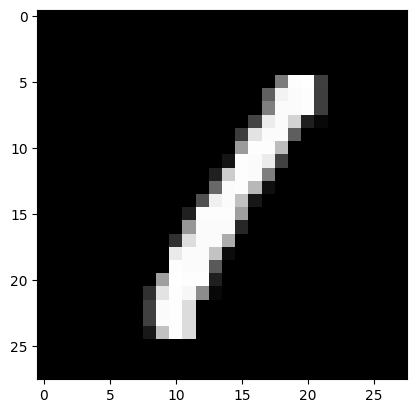

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)